# Description

TODO

- rename this file to be 27-

This file is actually the same as `05-gls-qqplot.ipynb` but in python; pick one of them.

# Modules

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot_2samples
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import conf

# Settings

In [2]:
N_PHENOTYPES = 400
N_LVS = 987

In [3]:
# INPUT_DIR = conf.RESULTS["GLS_NULL_SIMS"] / "phenoplier" / "gls"
INPUT_DIR = (
    conf.RESULTS["GLS_NULL_SIMS"] / "phenoplier" / "gls-gtex-mashr-mean_gene_expr"
)
display(INPUT_DIR)

PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr')

# Functions

In [4]:
def show_prop(data, frac=0.05):
    _pvalue_lt_frac = data[data["pvalue"] < frac]
    #     display(_pvalue_lt_frac.head())
    return _pvalue_lt_frac.shape[0] / data.shape[0]

In [5]:
def get_prop(pvalues, frac=0.05):
    _pvalue_lt_frac = pvalues[pvalues < frac]
    #     display(_pvalue_lt_frac.head())
    return _pvalue_lt_frac.shape[0] / pvalues.shape[0]

In [6]:
assert get_prop(np.array([0.20, 0.50]), 0.05) == 0.0
assert get_prop(np.array([0.20, 0.50, 0.75, 0.10, 0.04]), 0.05) == 0.2

In [7]:
assert get_prop(pd.Series(np.array([0.20, 0.50])), 0.05) == 0.0
assert get_prop(pd.Series(np.array([0.20, 0.50, 0.75, 0.10, 0.04])), 0.05) == 0.2

# Get files list

In [8]:
INPUT_FILES = list(INPUT_DIR.glob("*.tsv.gz"))
display(INPUT_FILES[:5])

[PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr/random.pheno86-combined-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr/random.pheno210-combined-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr/random.pheno357-combined-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr/random.pheno53-combined-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr/random.pheno215-combined-gls_phenoplier.tsv.gz')]

# Load data

In [9]:
dfs = [
    pd.read_csv(f, sep="\t").assign(phenotype=f.name.split("-")[0]) for f in INPUT_FILES
]

In [10]:
display(len(dfs))
assert len(dfs) == N_PHENOTYPES

400

In [11]:
dfs = pd.concat(dfs, axis=0, ignore_index=True)

In [12]:
dfs.shape

(394800, 4)

In [13]:
dfs.head()

,lv,coef,pvalue,phenotype
0,LV1,-0.013278,0.859441,random.pheno86
1,LV10,0.007884,0.263039,random.pheno86
2,LV100,-0.000429,0.514180,random.pheno86
3,LV101,0.000129,0.495790,random.pheno86
4,LV102,0.003206,0.400024,random.pheno86


In [14]:
_tmp = dfs.groupby("phenotype")["lv"].nunique().unique()
assert _tmp.shape[0] == 1
assert _tmp[0] == N_LVS

In [26]:
show_prop(dfs)

0.07228470111448834

# Summary

In [15]:
summary_list = []
for lv, lv_data in dfs.groupby("lv"):
    assert lv_data.shape[0] == N_PHENOTYPES

    summary_list.append(
        {
            "lv": lv,
            "1": get_prop(lv_data["pvalue"], 0.01),
            "5": get_prop(lv_data["pvalue"], 0.05),
            "10": get_prop(lv_data["pvalue"], 0.10),
        }
    )

summary_df = pd.DataFrame(summary_list)
assert summary_df.shape[0] == N_LVS

In [16]:
summary_df.shape

(987, 4)

In [17]:
summary_df.head()

,lv,1,5,10
0,LV1,0.0150,0.0475,0.0900
1,LV10,0.0200,0.0725,0.0975
2,LV100,0.0075,0.0325,0.0700
3,LV101,0.0125,0.0600,0.1100
4,LV102,0.0125,0.0425,0.0875


In [18]:
summary_df.describe()

,1,5,10
count,987.000000,987.000000,987.000000
mean,0.023799,0.072285,0.121624
std,0.020565,0.029505,0.034017
min,0.000000,0.012500,0.020000
25%,0.012500,0.052500,0.100000
50%,0.020000,0.067500,0.117500
75%,0.027500,0.085000,0.140000
max,0.225000,0.285000,0.330000


In [19]:
summary_df[summary_df["5"] < 0.08]

,lv,1,5,10
0,LV1,0.0150,0.0475,0.0900
1,LV10,0.0200,0.0725,0.0975
2,LV100,0.0075,0.0325,0.0700
3,LV101,0.0125,0.0600,0.1100
4,LV102,0.0125,0.0425,0.0875
...,...,...,...,...
978,LV980,0.0275,0.0675,0.1100
979,LV981,0.0150,0.0575,0.1150
983,LV985,0.0175,0.0600,0.1275
984,LV986,0.0175,0.0675,0.1200


In [20]:
summary_df[summary_df["5"] > 0.27]

,lv,1,5,10
672,LV704,0.225,0.285,0.33


In [21]:
summary_df[summary_df["lv"] != "LV704"].quantile(
    [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95]
)

,1,5,10
0.01,0.0025,0.0250,0.0600
0.05,0.0075,0.0375,0.0750
0.10,0.0075,0.0425,0.0850
0.15,0.0100,0.0475,0.0900
0.20,0.0125,0.0500,0.0950
0.25,0.0125,0.0525,0.1000
0.50,0.0200,0.0675,0.1175
0.75,0.0275,0.0850,0.1400
0.80,0.0300,0.0900,0.1450
0.85,0.0350,0.0950,0.1500


In [22]:
summary_df[~summary_df["lv"].isin(("LV704",))].describe()

,1,5,10
count,986.000000,986.000000,986.000000
mean,0.023595,0.072069,0.121412
std,0.019550,0.028731,0.033380
min,0.000000,0.012500,0.020000
25%,0.012500,0.052500,0.100000
50%,0.020000,0.067500,0.117500
75%,0.027500,0.085000,0.140000
max,0.202500,0.270000,0.307500


## See what's going on with that LV

In [23]:
multiplier_z = pd.read_pickle(conf.MULTIPLIER["MODEL_Z_MATRIX_FILE"])

In [24]:
multiplier_z.shape

(6750, 987)

In [25]:
multiplier_z.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
GAS6,0.000000,0.0,0.039438,0.0,0.050476,0.000000,0.0,0.000000,0.590949,0.000000,...,0.050125,0.00000,0.033407,0.000000,0.000000,0.005963,0.347362,0.0,0.000000,0.000000
MMP14,0.000000,0.0,0.000000,0.0,0.070072,0.000000,0.0,0.004904,1.720179,2.423595,...,0.000000,0.00000,0.001007,0.000000,0.035747,0.000000,0.000000,0.0,0.014978,0.000000
DSP,0.000000,0.0,0.000000,0.0,0.000000,0.041697,0.0,0.005718,0.000000,0.000000,...,0.020853,0.00000,0.000000,0.000000,0.000000,0.005774,0.000000,0.0,0.000000,0.416405
MARCKSL1,0.305212,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.161843,0.149471,...,0.027134,0.05272,0.000000,0.030189,0.060884,0.000000,0.000000,0.0,0.000000,0.448480
SPARC,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.014014,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.067779,0.0,0.122417,0.062665


In [54]:
multiplier_z["LV704"].sort_values(ascending=False).head(20)

CDC25A      7.663420
EIF3A       4.580440
MAT2B       4.225408
FGFR1OP     3.548053
CEP63       3.547427
RAB4A       2.459242
DYNLRB1     1.964849
TAF1B       1.498529
VTI1A       1.481292
DDX42       1.358032
DNAJA2      1.332558
NDUFS4      1.321993
PSMD14      1.308596
YWHAB       1.291895
CHMP5       1.190785
PTPN11      1.113178
TMEM117     1.079425
UGCG        1.036380
SLC25A12    0.982376
PRPF19      0.980791
Name: LV704, dtype: float64

In [56]:
multiplier_z["LV1"].sort_values(ascending=False).head(20)

POLD1      2.989508
TRIM28     2.967235
TOMM40     2.941369
PKMYT1     2.810091
CDT1       2.776054
VARS       2.533207
H2AFX      2.502205
KHSRP      2.499231
MCM2       2.493689
TONSL      2.466507
INCENP     2.422455
CAD        2.372358
U2AF2      2.367987
MYBL2      2.349290
SF3A2      2.246600
NOC2L      2.237970
MYBBP1A    2.220894
HMGA1      2.203837
POLRMT     2.179883
E2F1       2.158240
Name: LV1, dtype: float64

<AxesSubplot:xlabel='LV704', ylabel='Count'>

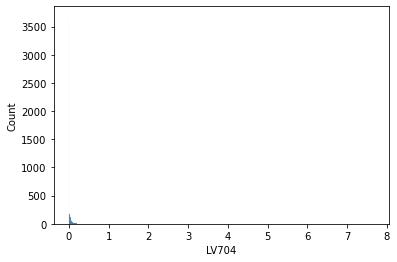

In [51]:
sns.histplot(multiplier_z["LV704"])

# Some QQ-plots

In [38]:
results = dfs[dfs["phenotype"] == "random.pheno28"]  # .sample(n=100)

In [39]:
results.shape

(987, 4)

In [40]:
results.head()

,lv,coef,pvalue,phenotype
324723,LV1,-0.003574,0.613726,random.pheno28
324724,LV10,0.004402,0.362157,random.pheno28
324725,LV100,-0.020043,0.950936,random.pheno28
324726,LV101,0.026487,0.015736,random.pheno28
324727,LV102,-0.001898,0.559386,random.pheno28


## Proportion pvalue < 0.05

In [41]:
show_prop(results, 0.01)

0.0243161094224924

In [42]:
show_prop(results, 0.05)

0.07092198581560284

In [43]:
show_prop(results, 0.10)

0.11550151975683891

In [44]:
show_prop(results, 0.15)

0.15602836879432624

In [45]:
show_prop(results, 0.20)

0.21073961499493415

## Plot

In [46]:
data = results["pvalue"].to_numpy()
n = data.shape[0]
uniform_data = np.array([i / (n + 1) for i in range(1, n + 1)])

In [47]:
display(data[:5])
display(uniform_data[:5])

array([0.61372607, 0.36215719, 0.95093589, 0.01573645, 0.55938585])

array([0.00101215, 0.00202429, 0.00303644, 0.00404858, 0.00506073])

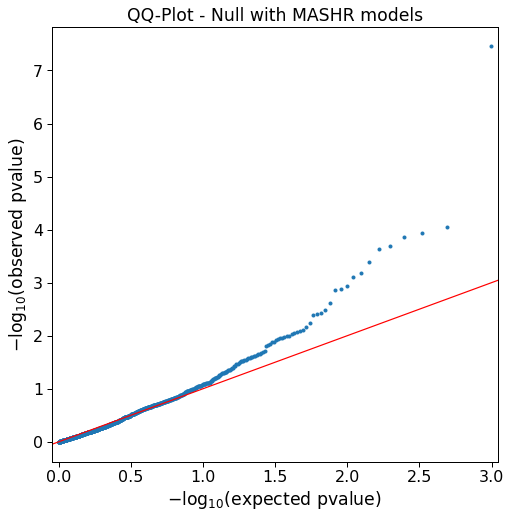

In [48]:
observed_data = -np.log10(data)
expected_data = -np.log10(uniform_data)

with sns.plotting_context("paper", font_scale=1.8), mpl.rc_context(
    {"lines.markersize": 3}
):
    fig, ax = plt.subplots(figsize=(8, 8))

    fig = qqplot_2samples(expected_data, observed_data, line="45", ax=ax)

    ax.set_xlim(expected_data.min() - 0.05, expected_data.max() + 0.05)

    ax.set_xlabel("$-\log_{10}$(expected pvalue)")
    ax.set_ylabel("$-\log_{10}$(observed pvalue)")
    ax.set_title("QQ-Plot - Null with MASHR models")